In [ ]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and
end of your recorded signal. Listen to the new signal and perceptually compare the audio with
original.

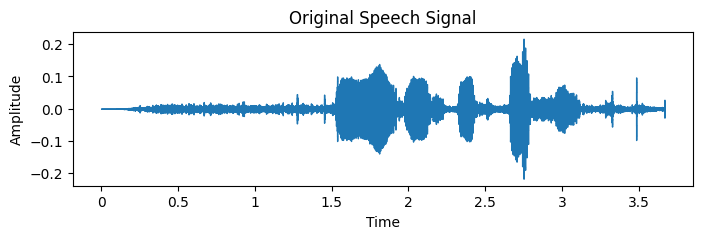

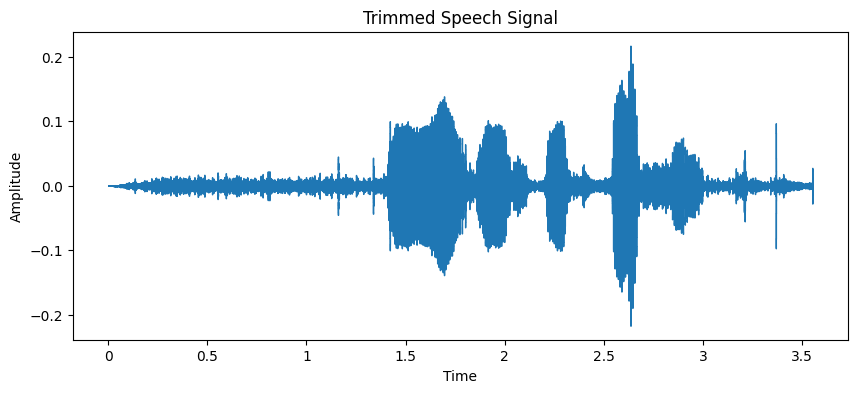

In [ ]:

# Load the audio file
y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')

# Display the original speech signal
plt.figure(figsize=(8, 2))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


# Trim the silent parts from the beginning and end of the signal
y_trimmed,index= librosa.effects.trim(y)

# Display the trimmed speech signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_trimmed, sr=sr)
plt.title('Trimmed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play
around with the top_db parameter and see the effects of split. Listen to the generated signals and
observe the split quality.

Number of segments with top_db=20: 12


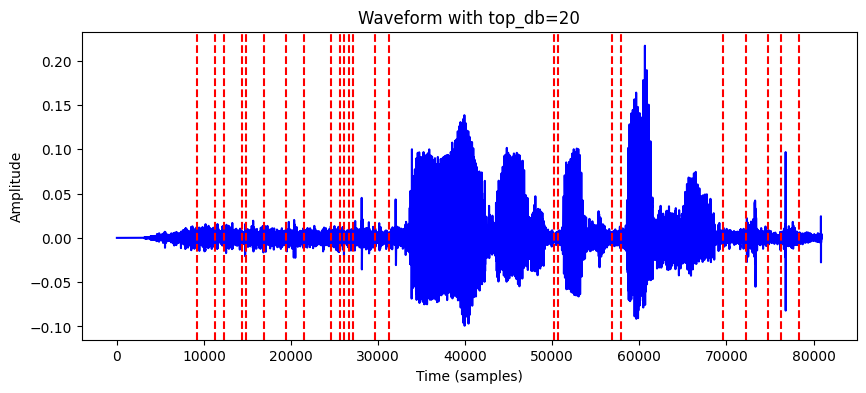

Segment 1 with top_db=20 saved as segment_0_top_db_20.wav
Playing segment 1 (top_db=20):


Segment 2 with top_db=20 saved as segment_1_top_db_20.wav
Playing segment 2 (top_db=20):


Segment 3 with top_db=20 saved as segment_2_top_db_20.wav
Playing segment 3 (top_db=20):


Segment 4 with top_db=20 saved as segment_3_top_db_20.wav
Playing segment 4 (top_db=20):


Segment 5 with top_db=20 saved as segment_4_top_db_20.wav
Playing segment 5 (top_db=20):


Segment 6 with top_db=20 saved as segment_5_top_db_20.wav
Playing segment 6 (top_db=20):


Segment 7 with top_db=20 saved as segment_6_top_db_20.wav
Playing segment 7 (top_db=20):


Segment 8 with top_db=20 saved as segment_7_top_db_20.wav
Playing segment 8 (top_db=20):


Segment 9 with top_db=20 saved as segment_8_top_db_20.wav
Playing segment 9 (top_db=20):


Segment 10 with top_db=20 saved as segment_9_top_db_20.wav
Playing segment 10 (top_db=20):


Segment 11 with top_db=20 saved as segment_10_top_db_20.wav
Playing segment 11 (top_db=20):


Segment 12 with top_db=20 saved as segment_11_top_db_20.wav
Playing segment 12 (top_db=20):


Number of segments with top_db=30: 1


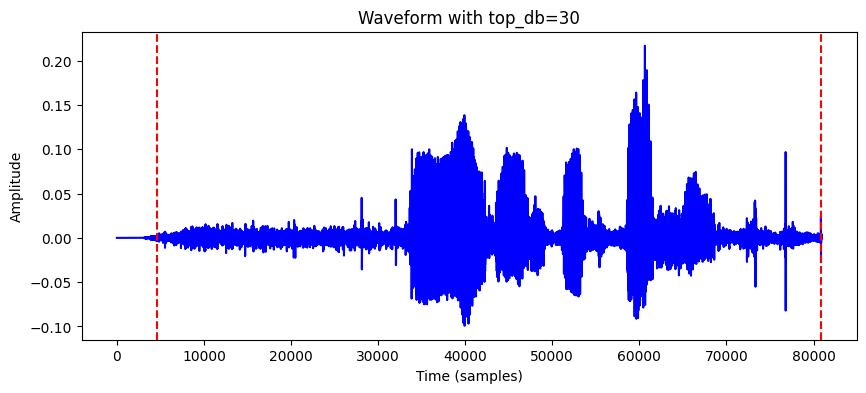

Segment 1 with top_db=30 saved as segment_0_top_db_30.wav
Playing segment 1 (top_db=30):


Number of segments with top_db=40: 1


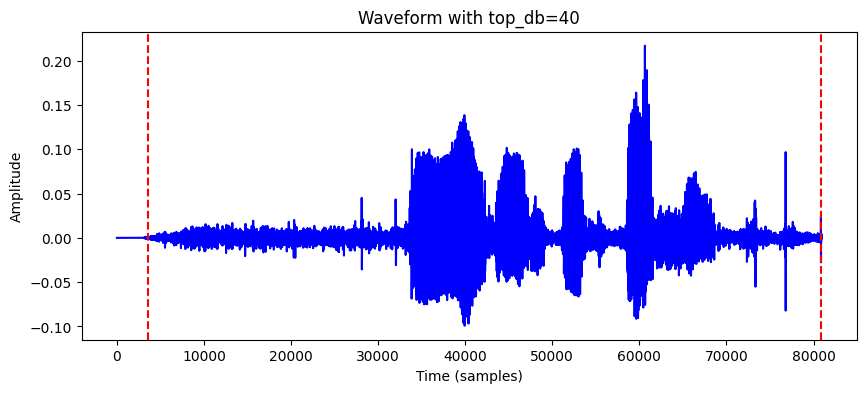

Segment 1 with top_db=40 saved as segment_0_top_db_40.wav
Playing segment 1 (top_db=40):


In [20]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the recorded speech audio file
audio_path = "/content/drive/MyDrive/mahesh.wav"
y, sr = librosa.load(audio_path)

for top_db in top_db_values:
    # Split the audio based on detected silences
    segments = librosa.effects.split(y, top_db=top_db)

    # Print the number of segments detected
    print(f"Number of segments with top_db={top_db}: {len(segments)}")

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(y, color='b')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform with top_db={top_db}')

    # Plot vertical lines for segment boundaries
    for segment in segments:
        plt.axvline(x=segment[0], color='r', linestyle='--')
        plt.axvline(x=segment[1], color='r', linestyle='--')

    plt.show()

    # Play and save each segment
    for i, segment in enumerate(segments):
        segment_audio = y[segment[0]:segment[1]]
        segment_output_path = f"segment_{i}_top_db_{top_db}.wav"
        sf.write(segment_output_path, segment_audio, sr)
        print(f"Segment {i+1} with top_db={top_db} saved as {segment_output_path}")

        # Play the split audio segment
        print(f"Playing segment {i+1} (top_db={top_db}):")
        ipd.display(ipd.Audio(segment_audio, rate=sr))
